# KD Diagnosis: XGBoost Take 1
---
[XGBoost Documentation](http://xgboost.readthedocs.io/en/latest/python/python_api.html#)
1. Load in KD data
2. Set XGB hyperparameters
3. Train XGB model
4. Show feature importance
5. Plot XGB tree
6. **TODO:** hyperparameter optimization (see: skopt)

In [1]:
# Imports
import sys
sys.path.append('../') # Make parent folder visible
from preprocess import load_data
from sklearn import preprocessing
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle as pkl


In [2]:
# Preprocessing - XGBoost should be invariant to this
# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [3]:
# Get feature names
f = open('../data/kd_dataset.pkl','rb')
x_train, x_test, y_train, y_test = pkl.load(f)
feature_names = list(x_train)

In [4]:
# Create Data Matrices
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(x_test, label=y_test, feature_names=feature_names)

In [5]:
# Set Hyperparameters
    # Docs: https://xgboost.readthedocs.io/en/latest/parameter.html
param = {
    'max_depth': 5, 
    'eta': 0.3, 
    'objective': 'binary:logistic', 
    'eval_metric': 'auc'
}

evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 20

In [6]:
# Train model
bst = xgb.train(param, dtrain, num_boost_round=num_round, evals=evallist)

[0]	eval-auc:0.880844	train-auc:0.982093
[1]	eval-auc:0.901858	train-auc:0.991824
[2]	eval-auc:0.922655	train-auc:0.993566
[3]	eval-auc:0.926829	train-auc:0.995526
[4]	eval-auc:0.93427	train-auc:0.997557
[5]	eval-auc:0.938335	train-auc:0.998658
[6]	eval-auc:0.937754	train-auc:0.998729
[7]	eval-auc:0.944469	train-auc:0.999211
[8]	eval-auc:0.94367	train-auc:0.999506
[9]	eval-auc:0.943706	train-auc:0.999588
[10]	eval-auc:0.944287	train-auc:0.999717
[11]	eval-auc:0.948425	train-auc:0.999882
[12]	eval-auc:0.949296	train-auc:0.999965
[13]	eval-auc:0.953252	train-auc:0.999976
[14]	eval-auc:0.954123	train-auc:0.999988
[15]	eval-auc:0.955067	train-auc:1
[16]	eval-auc:0.95572	train-auc:1
[17]	eval-auc:0.956083	train-auc:1
[18]	eval-auc:0.95797	train-auc:1
[19]	eval-auc:0.957317	train-auc:1


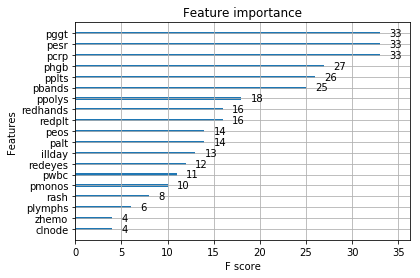

In [7]:
# Plot feature importances
xgb.plot_importance(bst)
plt.show()

In [8]:
# Draw tree diagram
TREE_NUM = 0
xgb.plot_tree(bst, num_trees=TREE_NUM)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.savefig('xgb-sample-tree.pdf')